<a href="https://colab.research.google.com/github/maverick100/kaggle_kernels/blob/master/IMDBwtihKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb
import numpy as np
from keras import models,layers



Using TensorFlow backend.


**Loading IMDB dataset **

In [3]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=1000)

17465344/17464789 [==============================] - 0s 0us/step


In [33]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

## Decoding a sentence


In [5]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decode_review=" ".join(reverse_word_index.get(i-3,"?") for i in train_data[0])

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
decode_review

"? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all"

### One hot encoding

In [0]:
def vectorize(sequence,dimentions=10000):
  results=np.zeros((len(sequence),dimentions))
  for i,val in enumerate(sequence):
    results[i,val]=1
  return results
    

In [0]:

x_train=vectorize(train_data)
x_test=vectorize(test_data)

In [0]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [10]:
type(x_train)

numpy.ndarray

**Building our model**

In [11]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


**Training our model**

In [0]:
from keras import metrics,losses,optimizers


In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.0001),loss=losses.binary_crossentropy,metrics=['accuracy'])

In [0]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [15]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.6837 - acc: 0.5733 - val_loss: 0.6712 - val_acc: 0.6319
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.6555 - acc: 0.6953 - val_loss: 0.6414 - val_acc: 0.7433
Epoch 3/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.6248 - acc: 0.7586 - val_loss: 0.6122 - val_acc: 0.7777
Epoch 4/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.5954 - acc: 0.7941 - val_loss: 0.5841 - val_acc: 0.7916
Epoch 5/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.5663 - acc: 0.8081 - val_loss: 0.5567 - val_acc: 0.8106
Epoch 6/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.5390 - acc: 0.8181 - val_loss: 0.5318 - val_acc: 0.8148
Epoch 7/20
15000/15000 [==============================] - 2s 128us/step - 

**Evaluation of model**

In [0]:
import matplotlib.pyplot as plt


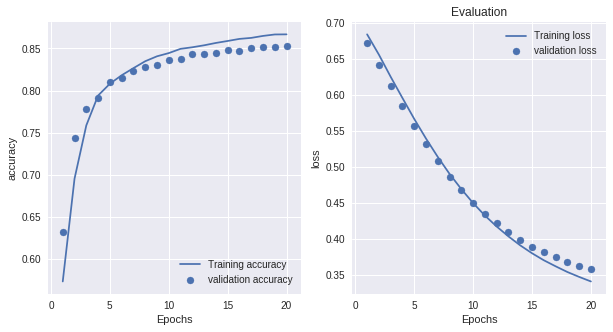

In [31]:
plt.figure(figsize=(10,5))
acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.subplot(1,2,1)
plt.plot(epochs,acc,label="Training accuracy")
plt.scatter(epochs,val_acc,label="validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,loss,label="Training loss")
plt.scatter(epochs,val_loss,label="validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.title("Evaluation")

plt.show()
